In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


I ran this code again and again so Some result i got i saved it as images and i will share those images

In [ ]:
import pandas as pd
import numpy as np
import tarfile
import os
from google.colab import drive
import glob
from PIL import Image
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import Dataset, DataLoader
from itertools import combinations
from torchvision import transforms
import matplotlib.pyplot as plt
import json
import base64
from PIL import Image
from io import BytesIO
import itertools
import random
import torch.nn as nn
import matplotlib.pyplot as plt


In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device

device(type='cuda')

# PART A

There are some codes which i used first to extract images from zip file and split it into train,val,test and save that data into different json files named train,val,test respectively

In [ ]:
# import os
# os.chdir('/content/drive/MyDrive/assignment2782')

# import zipfile

# # Specify the path to your ZIP file
# zip_file_path = 'lfw.zip'

# # Create a ZipFile object
# with zipfile.ZipFile(zip_file_path, 'r') as zip_ref:
#     # Extract all the contents of the ZIP file to a directory
#     zip_ref.extractall()

In [ ]:
# import os
# import shutil
# import random

# # Specify the source directory where your subfolders are located
# source_directory = '/content/drive/MyDrive/assignment2782/lfw'  # Replace with your actual source directory path

# # Create destination directories
# train_dir = '/content/drive/MyDrive/train'
# validation_dir = '/content/drive/MyDrive/validation'
# test_dir = '/content/drive/MyDrive/test'

# os.makedirs(train_dir, exist_ok=True)
# os.makedirs(validation_dir, exist_ok=True)
# os.makedirs(test_dir, exist_ok=True)

# # List the subfolders in the source directory
# subfolders = [folder for folder in os.listdir(source_directory) if os.path.isdir(os.path.join(source_directory, folder))]

# # Calculate the sizes of the training, validation, and test sets
# total_subfolders = len(subfolders)
# train_size = int(0.7 * total_subfolders)
# validation_size = int(0.15 * total_subfolders)
# test_size = total_subfolders - train_size - validation_size

# # Shuffle the list of subfolders to ensure randomness in the split
# random.shuffle(subfolders)

# # Move the subfolders to their respective destination directories
# for i, subfolder in enumerate(subfolders):
#     source_subfolder_path = os.path.join(source_directory, subfolder)

#     if i < train_size:
#         destination_dir = train_dir
#     elif i < train_size + validation_size:
#         destination_dir = validation_dir
#     else:
#         destination_dir = test_dir

#     destination_subfolder_path = os.path.join(destination_dir, subfolder)

#     # Use shutil.move to move the subfolder
#     shutil.move(source_subfolder_path, destination_subfolder_path)

# print("Subfolders split and moved successfully.")


In [ ]:

# import os
# image_path1 = '/content/drive/MyDrive/train'

In [ ]:
# from PIL import Image as img
# from collections import defaultdict
# def get_images(path):
#   celeb_dict = defaultdict(list)
#   celebrities_list = [folder for folder in os.listdir(path) if os.path.isdir(os.path.join(path, folder))]
#   for celebs in celebrities_list:
#     for file in os.listdir(os.path.join(path,celebs)):
#       if(file.endswith('.jpg')):
#         image = img.open(path+'/'+celebs+'/'+file)
#         celeb_dict[celebs].append(image)

#   return celeb_dict

# d1 = get_images(image_path)

## Q.3


In [ ]:
# # Function to read images from a given folder
# from PIL import Image
# def read_images_from_folder(folder_path):
#     images = []
#     folder_full_path = os.path.join(image_path1, folder_path)
#     for filename in os.listdir(folder_full_path):
#         if filename.endswith(('.jpg', '.jpeg', '.png')):
#             image_path = os.path.join(folder_full_path, filename)
#             image = Image.open(image_path)
#             images.append(image)
#     return images

# a = [folder for folder in os.listdir(image_path1) if os.path.isdir(os.path.join(image_path1, folder))]
# # Read images for train celebrities
# train_data = {}
# for celebrity in a:
#     images = read_images_from_folder(celebrity)
#     train_data[celebrity] = images

In [ ]:
# image_path_test = '/content/drive/MyDrive/test'
# # Function to read images from a given folder
# from PIL import Image
# def read_images_from_folder(path,folder_path):
#     images = []

#     folder_full_path = os.path.join(path, folder_path)
#     for filename in os.listdir(folder_full_path):
#         if filename.endswith(('.jpg', '.jpeg', '.png')):
#             image_path = os.path.join(folder_full_path, filename)
#             image = Image.open(image_path)
#             images.append(image)
#     return images

# b = [folder for folder in os.listdir(image_path_test) if os.path.isdir(os.path.join(image_path_test, folder))]
# # Read images for train celebrities
# test_data = {}
# for celebrity in b:
#     images = read_images_from_folder(image_path_test,celebrity)
#     test_data[celebrity] = images

# image_path_val = '/content/drive/MyDrive/validation'


# c = [folder for folder in os.listdir(image_path_val) if os.path.isdir(os.path.join(image_path_val, folder))]
# # Read images for train celebrities
# val_data = {}
# for celebrity in c:
#     images = read_images_from_folder(image_path_val,celebrity)
#     val_data[celebrity] = images

## Q4 & 5

In [ ]:
#import dataset module from torch
import pandas as pd
from torch.utils.data import Dataset
import torch
from itertools import combinations
import random
from torchvision import transforms
transform = transforms.ToTensor()

#inherited class for generating sequences for training

#-------------------------------------Data generator class---------------------------------------------------------------------#

class data_gen(Dataset):

  def __init__(self,data):
    self.input = data
    self.celeb_list = list(self.input.keys())

    try:
      self.celeb_list.remove('train')
    except ValueError:
      # Handle the case where 'train' is not in the list
      print("'train' not found in the list")

    try:
      self.celeb_list.remove('validation')
    except ValueError:
      # Handle the case where 'validation' is not in the list
      print("'validation' not found in the list")

    try:
      self.celeb_list.remove('test')
    except ValueError:
      # Handle the case where 'test' is not in the list
      print("'test' not found in the list")

    self.all_pairs = self.gendata()

  def __len__(self):
    return len(self.all_pairs)

  def __getitem__(self,idx):
    img1,img2,label = self.all_pairs[idx]
    img1.resize((224,224))
    img2.resize((224,224))
    img1 = transform(img1)
    img2 = transform(img2)
    label = torch.tensor(label,dtype=torch.float32)
    return img1,img2,label


  def gendata(self):
    final_pairs = []
    for celeb in self.celeb_list:
      positive_pairs = []
      other_celebs = [x for x in self.celeb_list if x!=celeb]
      neg_pairs = []
      # collect all positive pairs
      if(len(self.input[celeb])>2):
        list1 = combinations(self.input[celeb],2)
        listoflists = [list(item) for item in list1]
        listoflists = [item+[1] for item in listoflists]
        size = min(11,len(listoflists))
        #we basically want maximum of 10 positive pairs for each celebrity to avoid computational conflicts
        positive_pairs.extend(listoflists[0:size])

      final_pairs.extend(positive_pairs)
      #same number of negative samples to get balanced dataset
      for i in range(len(positive_pairs)):
        #random sample from other celebrities
        celebrity = random.choice(other_celebs)
        photo1 = random.choice(self.input[celebrity])
        photo2 = random.choice(self.input[celeb])
        neg_pairs.append([photo2,photo1,0])

      final_pairs.extend(neg_pairs)

    return final_pairs






In [ ]:
#reading saved json files
import json
import base64
from PIL import Image
from io import BytesIO
import itertools

# Read the  training JSON file
file_path = '/content/drive/MyDrive/train.json'

with open(file_path, 'r') as json_file:
    train = json.load(json_file)

# Convert base64-encoded strings back to PIL images
for celeb, img_list in train.items():
    loaded_images = []
    for img_str in img_list:
        img_bytes = base64.b64decode(img_str)
        img = Image.open(BytesIO(img_bytes))
        loaded_images.append(img)
    train[celeb] = loaded_images

traingen = data_gen(train)


In [ ]:
# Read the  training JSON file
file_path = '/content/drive/MyDrive/test.json'

with open(file_path, 'r') as json_file:
    train = json.load(json_file)

# Convert base64-encoded strings back to PIL images
for celeb, img_list in train.items():
    loaded_images = []
    for img_str in img_list:
        img_bytes = base64.b64decode(img_str)
        img = Image.open(BytesIO(img_bytes))
        loaded_images.append(img)
    train[celeb] = loaded_images

testgen = data_gen(train)
# Read the  training JSON file
file_path = '/content/drive/MyDrive/val.json'

with open(file_path, 'r') as json_file:
    train = json.load(json_file)

# Convert base64-encoded strings back to PIL images
for celeb, img_list in train.items():
    loaded_images = []
    for img_str in img_list:
        img_bytes = base64.b64decode(img_str)
        img = Image.open(BytesIO(img_bytes))
        loaded_images.append(img)
    train[celeb] = loaded_images

valgen = data_gen(train)

'train' not found in the list
'validation' not found in the list
'test' not found in the list
'train' not found in the list
'validation' not found in the list
'test' not found in the list


In [ ]:
# resenet model after removing final softmax layer
resnet_model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=False)
resnet_model = nn.Sequential(*list(resnet_model.children())[:-1])

#we don't want to train resnet model
for param in resnet_model.parameters():
    param.requires_grad = False


Downloading: "https://github.com/pytorch/vision/zipball/v0.10.0" to /root/.cache/torch/hub/v0.10.0.zip
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=None`.
  warnings.warn(msg)


## Q.6

In [ ]:
#class for Siamese network
class Siamese(nn.Module):

  #take model name as input and make siamese of that model
  def __init__(self,model):
    super(Siamese, self).__init__()
    #model
    self.net1 = resnet_model
    #fully connected layer on top of the resnet
    self.fc = nn.Sequential(
        nn.Linear(2048, 1024),
        nn.ReLU(inplace=True),
        nn.Linear(1024, 512),
        nn.ReLU(inplace=True),
        nn.Dropout(p=0.5),  #added dropout layer to avoid overfitting
        nn.ReLU(inplace=True),
        nn.Linear(512,64),
        nn.ReLU(inplace=True)
    )

  #forward propogation function
  def forward(self,x1,x2):
    out1 = self.net1(x1)
    out1 = self.fc(out1.view(out1.size()[0],-1))#flatten the matrix
    out2 = self.net1(x2)
    out2 = self.fc(out2.view(out2.size()[0],-1))

    return out1,out2

#define a loss function
class ContrastiveLoss(nn.Module):
  #define a margin for our loss function
  def __init__(self,margin):
    super(ContrastiveLoss,self).__init__()
    self.margin = margin

  def forward(self,out1,out2,label):
    euclidean_dist = torch.nn.PairwiseDistance(p=2)
    #used euclidean distance as similarity measure
    dist = euclidean_dist(out1,out2)
    #loss
    loss = torch.mean((1-label)*torch.pow(dist,2)+label*torch.pow(torch.clamp(self.margin-dist,min=0.0),2))
    return loss




In [ ]:
#dataloader with custom batch sizd
train_loader = DataLoader(traingen,batch_size=64,shuffle=True)
val_loader = DataLoader(valgen,batch_size=64,shuffle=True)
test_loader = DataLoader(testgen,batch_size=64,shuffle=True)

In [ ]:
#-----------------------------train function -----------------------------------
def train(model,optimizer,num_epochs,val,train,loss_model):
  #training loop____________________________________________________
  for epoch in range(num_epochs):
    train_loss=0
    val_loss = 0

    model.train()
    for img1,img2,label in train:
      img1,img2,label = img1.cuda(),img2.cuda(),label.cuda()
      optimizer.zero_grad()
      out1,out2 = model.forward(img1,img2)
      loss = loss_model.forward(out1,out2,label) #caluclating loss
      train_loss += loss.item()
      loss.backward() #backpropogation
      optimizer.step() #weight update

    model.eval()
    for img1, img2, labels in val:
      img1, img2, labels = img1.cuda(), img2.cuda(), labels.cuda()
      out1, out2 = model.forward(img1,img2)
      loss = loss_model.forward(out1,out2,labels)
      val_loss += loss

    avg_train_loss = train_loss/len(train)
    avg_val_loss = val_loss/len(val)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss}")
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss}")
    print("============================================")



In [ ]:
import torch.optim as optim

margin=2 #defining a margin
#model intialization
model = Siamese(resnet_model).to(device)
loss_model = ContrastiveLoss(margin)
lr = 1e-3
#we are using Adam optimizer with learning rate=3x10^-4
optimizer = optim.Adam(model.parameters(),lr)
num_epochs=10
# Set requires_grad to True for the fully connected layers
for param in model.fc.parameters():
    param.requires_grad = True

train(model,optimizer,num_epochs,val_loader,train_loader,loss_model)

Epoch [1/10], Train Loss: 1.121529739232933
Epoch [1/10], Validation Loss: 1.7971231937408447
Epoch [2/10], Train Loss: 1.0451715727272273
Epoch [2/10], Validation Loss: 1.826884150505066
Epoch [3/10], Train Loss: 1.0394237510063364
Epoch [3/10], Validation Loss: 1.8945286273956299
Epoch [4/10], Train Loss: 1.0342251373536933
Epoch [4/10], Validation Loss: 1.8504494428634644
Epoch [5/10], Train Loss: 1.0368569425816805
Epoch [5/10], Validation Loss: 1.827064871788025
Epoch [6/10], Train Loss: 1.033138744486203
Epoch [6/10], Validation Loss: 1.9002771377563477
Epoch [7/10], Train Loss: 1.0353667541120037
Epoch [7/10], Validation Loss: 1.9227739572525024
Epoch [8/10], Train Loss: 1.0203231805525486
Epoch [8/10], Validation Loss: 1.9385521411895752
Epoch [9/10], Train Loss: 1.0249751603828285
Epoch [9/10], Validation Loss: 1.9596647024154663
Epoch [10/10], Train Loss: 1.0214020309958067
Epoch [10/10], Validation Loss: 1.9578869342803955


0.49994830438378823


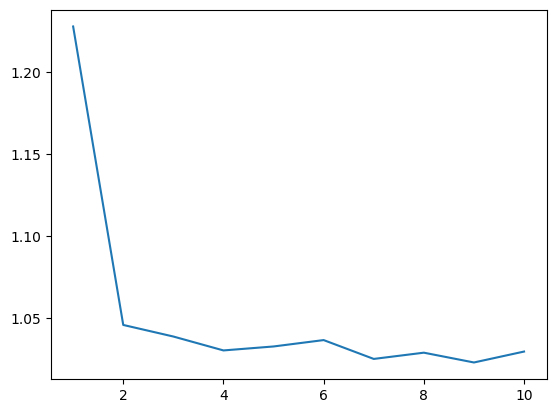

In [ ]:
#--------------------testing of model------------------------------------
model.eval()
test_loss=0
accuracy = 0
k =0
for img1, img2, labels in test_loader:
  img1, img2, labels = img1.cuda(), img2.cuda(), labels.cuda()
  out1, out2 = model.forward(img1,img2)
  euclidean_dist = torch.nn.PairwiseDistance(p=2)
  dist = euclidean_dist(out1,out2)
  #defining a threshold (beyond which we can say both images aren't same)(got by trial and error on validation data)
  a = dist<0.91
  a= a.to(torch.int)
  correct_predictions = (a == labels.to(torch.int)).sum().item()
  total_predictions = labels.size(0)
  accuracy += correct_predictions / total_predictions
  k+=1

#printing average accuracy across batches
print(accuracy/k)

listepoch = [1,2,3,4,5,6,7,8,9,10]
loss = [1.2281095966603022,1.0456101050916708,1.0385332992241818,1.0300282873447586,1.0324503202108468,1.0363553946123183,1.0248320496307228,1.0286523126206308,1.0226617980303254,1.029340627433369]
plt.plot(listepoch,loss)

## Q.8

In [ ]:
#let's try different optimizers

## 1. RMSprop optimizer
model1 = Siamese(resnet_model).to(device)
num_epochs=8
optimizer = optim.RMSprop(model1.parameters(), lr)
train(model1,optimizer,num_epochs,val_loader,train_loader,loss_model)

Epoch [1/8], Train Loss: 295.8999104334873
Epoch [1/8], Validation Loss: 1.7543319463729858
Epoch [2/8], Train Loss: 1.1439372252368327
Epoch [2/8], Validation Loss: 1.691139578819275
Epoch [3/8], Train Loss: 1.0908929083332326
Epoch [3/8], Validation Loss: 1.6714118719100952
Epoch [4/8], Train Loss: 1.087359887623937
Epoch [4/8], Validation Loss: 1.7573626041412354
Epoch [5/8], Train Loss: 1.0795563616842594
Epoch [5/8], Validation Loss: 1.8897157907485962
Epoch [6/8], Train Loss: 1.10906649535557
Epoch [6/8], Validation Loss: 1.7962254285812378
Epoch [7/8], Train Loss: 1.1273869096108202
Epoch [7/8], Validation Loss: 1.7582685947418213
Epoch [8/8], Train Loss: 1.0939246641015106
Epoch [8/8], Validation Loss: 1.831417441368103


0.5000258478081059


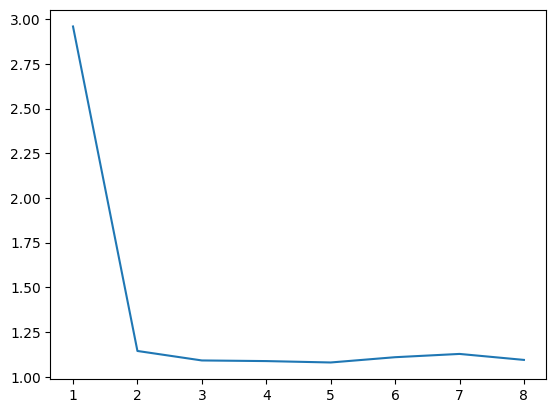

In [ ]:
model1.eval()
test_loss=0
accuracy = 0
k =0
for img1, img2, labels in test_loader:
  img1, img2, labels = img1.cuda(), img2.cuda(), labels.cuda()
  out1, out2 = model1.forward(img1,img2)
  euclidean_dist = torch.nn.PairwiseDistance(p=2)
  dist = euclidean_dist(out1,out2)
  a = dist<0.91
  a= a.to(torch.int)
  correct_predictions = (a == labels.to(torch.int)).sum().item()
  total_predictions = labels.size(0)
  accuracy += correct_predictions / total_predictions
  k+=1

print(accuracy/k)

listepoch1 = [1,2,3,4,5,6,7,8]
loss1 = [295.8999104334873,1.1439372252368327,1.0908929083332326,1.087359887623937,1.0795563616842594,1.10906649535557,1.1273869096108202,1.0939246641015106]
plt.plot(listepoch1,loss1)

Here in case of RMSprop optimizer initial loss is high but it rapidly decreases and settles down to value.one of the reason can be:
RMSprop adjusts the learning rate for each parameter individually based on the recent history of gradients. In the initial stages of training, when the model's parameters are far from their optimal values, the learning rates for some parameters might be very small. As a result, the model might converge more slowly, leading to a higher initial loss. This is in contrast to simpler optimizers like SGD that use a fixed learning rate.



In [ ]:
#let's try different optimizers
#2. AdamW optimizer
model2 = Siamese(resnet_model).to(device)
optimizer = optim.AdamW(model2.parameters(), lr)
train(model2,optimizer,num_epochs,val_loader,train_loader,loss_model)

Epoch [1/8], Train Loss: 1.1363117121300608
Epoch [1/8], Validation Loss: 1.6957582235336304
Epoch [2/8], Train Loss: 1.050925908223638
Epoch [2/8], Validation Loss: 1.919110894203186
Epoch [3/8], Train Loss: 1.036799410604081
Epoch [3/8], Validation Loss: 1.8712196350097656
Epoch [4/8], Train Loss: 1.0492314370173328
Epoch [4/8], Validation Loss: 1.874170184135437
Epoch [5/8], Train Loss: 1.0452268562226925
Epoch [5/8], Validation Loss: 1.8793518543243408
Epoch [6/8], Train Loss: 1.032278929116591
Epoch [6/8], Validation Loss: 1.8966776132583618
Epoch [7/8], Train Loss: 1.0349277726509287
Epoch [7/8], Validation Loss: 1.916854739189148
Epoch [8/8], Train Loss: 1.0279712032222148
Epoch [8/8], Validation Loss: 1.9638766050338745


0.5000258478081059


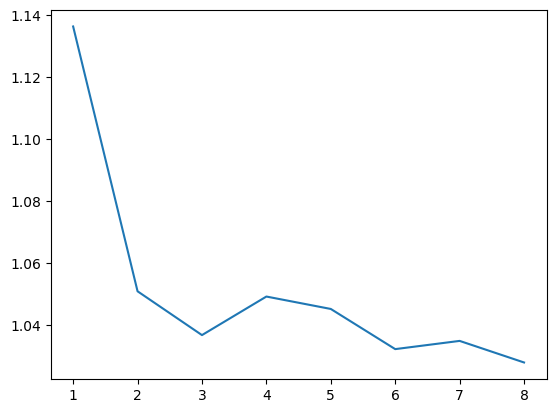

In [ ]:
model2.eval()
test_loss=0
accuracy = 0
k =0
for img1, img2, labels in test_loader:
  img1, img2, labels = img1.cuda(), img2.cuda(), labels.cuda()
  out1, out2 = model2.forward(img1,img2)
  euclidean_dist = torch.nn.PairwiseDistance(p=2)
  dist = euclidean_dist(out1,out2)
  a = dist<0.85
  a= a.to(torch.int)
  correct_predictions = (a == labels.to(torch.int)).sum().item()
  total_predictions = labels.size(0)
  accuracy += correct_predictions / total_predictions
  k+=1

print(accuracy/k)

listepoch2 = [1,2,3,4,5,6,7,8]
loss2 = [1.1363117121300608,1.050925908223638,1.036799410604081,1.0492314370173328,1.0452268562226925,1.032278929116591,1.0349277726509287,1.0279712032222148]
plt.plot(listepoch2,loss2)

here initial loss is low as compared to other optimizer but there are variations at the end.  AdamW have adaptive moments (moving averages of gradients and squared gradients) that can lead to variations in updates as the training progresses.

## Q.6(a)

In [ ]:
#it might be better if we will train our model with augmented images. so that our model
#can generalize on test data
num_epochs=8
model3 = Siamese(resnet_model).to(device)
#custom transformation
augmentation_transform = transforms.Compose([
  transforms.RandomHorizontalFlip(1),
  transforms.ColorJitter(brightness = 0.1, contrast = 0.5, saturation = 0.5, hue = 0.2),
  transforms.Resize(224)
])

for epoch in range(num_epochs):
    train_loss=0
    val_loss = 0

    model.train()
    for img1,img2,label in train_loader:
      #using augmentation for some epochs only
      if((epoch+1)%3==0):
        print(epoch)
        img1 = augmentation_transform(img1)
        img2 = augmentation_transform(img2)
      img1,img2,label = img1.cuda(),img2.cuda(),label.cuda()
      optimizer.zero_grad()
      out1,out2 = model3.forward(img1,img2)
      loss = loss_model.forward(out1,out2,label)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()

    model.eval()
    for img1, img2, labels in val_loader:
      img1, img2, labels = img1.cuda(), img2.cuda(), labels.cuda()
      out1, out2 = model3.forward(img1,img2)
      loss = loss_model.forward(out1,out2,labels)
      val_loss += loss

    avg_train_loss = train_loss/len(train_loader)
    avg_val_loss = val_loss/len(val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss}")
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss}")
    print("============================================")



## Q.7

In [ ]:
#let's try to add some lr schedulers and try
from torch.optim.lr_scheduler import StepLR
model = Siamese(resnet_model).to(device)

# Define a learning rate scheduler (e.g., StepLR)
scheduler = StepLR(optimizer, step_size=5, gamma=0.8)

for epoch in range(num_epochs):
    train_loss=0
    val_loss = 0

    model.train()
    for img1,img2,label in train_loader:
      img1,img2,label = img1.cuda(),img2.cuda(),label.cuda()
      optimizer.zero_grad()
      out1,out2 = model.forward(img1,img2)
      loss = loss_model.forward(out1,out2,label)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()
    # Adjust the learning rate with the scheduler
    scheduler.step()

    model.eval()
    for img1, img2, labels in val_loader:
      img1, img2, labels = img1.cuda(), img2.cuda(), labels.cuda()
      out1, out2 = model.forward(img1,img2)
      loss = loss_model.forward(out1,out2,labels)
      val_loss += loss

    avg_train_loss = train_loss/len(train_loader)
    avg_val_loss = val_loss/len(val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss}")
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss}")
    print("============================================")



Epoch [1/10], Train Loss: 1.1950461444614817
Epoch [1/10], Validation Loss: 1.7600187063217163
Epoch [2/10], Train Loss: 1.1933976606752887
Epoch [2/10], Validation Loss: 1.7517261505126953
Epoch [3/10], Train Loss: 1.1965318738289599
Epoch [3/10], Validation Loss: 1.7647260427474976
Epoch [4/10], Train Loss: 1.1957359520144433
Epoch [4/10], Validation Loss: 1.7579840421676636
Epoch [5/10], Train Loss: 1.1956237307134665
Epoch [5/10], Validation Loss: 1.7662853002548218
Epoch [6/10], Train Loss: 1.1947535861213252
Epoch [6/10], Validation Loss: 1.7511930465698242
Epoch [7/10], Train Loss: 1.1938907305399578
Epoch [7/10], Validation Loss: 1.747915267944336
Epoch [8/10], Train Loss: 1.1951399456779912
Epoch [8/10], Validation Loss: 1.761283278465271
Epoch [9/10], Train Loss: 1.189295912688633
Epoch [9/10], Validation Loss: 1.7524387836456299
Epoch [10/10], Train Loss: 1.195481853290174
Epoch [10/10], Validation Loss: 1.761911392211914


In [ ]:
model.eval()
test_loss=0
accuracy = 0
k =0
for img1, img2, labels in test_loader:
  img1, img2, labels = img1.cuda(), img2.cuda(), labels.cuda()
  out1, out2 = model.forward(img1,img2)
  euclidean_dist = torch.nn.PairwiseDistance(p=2)
  dist = euclidean_dist(out1,out2)
  a = dist<0.85
  a= a.to(torch.int)
  correct_predictions = (a == labels.to(torch.int)).sum().item()
  total_predictions = labels.size(0)
  accuracy += correct_predictions / total_predictions
  k+=1

print(accuracy/k)

0.500801282051282


In [ ]:
#let's try to add some lre schedulers and try
from torch.optim.lr_scheduler import CyclicLR
model = Siamese(resnet_model).to(device)

optimizer = optim.SGD(model.parameters(), lr=3e-4)

# Define a learning rate scheduler (e.g., StepLR)
scheduler = CyclicLR(optimizer, base_lr=0.001, max_lr=0.1, step_size_up=2000)

for epoch in range(num_epochs):
    train_loss=0
    val_loss = 0

    model.train()
    for img1,img2,label in train_loader:
      img1,img2,label = img1.cuda(),img2.cuda(),label.cuda()
      optimizer.zero_grad()
      out1,out2 = model.forward(img1,img2)
      loss = loss_model.forward(out1,out2,label)
      train_loss += loss.item()
      loss.backward()
      optimizer.step()
    # Adjust the learning rate with the scheduler
    scheduler.step()

    model.eval()
    for img1, img2, labels in val_loader:
      img1, img2, labels = img1.cuda(), img2.cuda(), labels.cuda()
      out1, out2 = model.forward(img1,img2)
      loss = loss_model.forward(out1,out2,labels)
      val_loss += loss

    avg_train_loss = train_loss/len(train_loader)
    avg_val_loss = val_loss/len(val_loader)

    print(f"Epoch [{epoch+1}/{num_epochs}], Train Loss: {avg_train_loss}")
    print(f"Epoch [{epoch+1}/{num_epochs}], Validation Loss: {avg_val_loss}")
    print("============================================")



Epoch [1/10], Train Loss: 1.036705933651834
Epoch [1/10], Validation Loss: 1.760151743888855
Epoch [2/10], Train Loss: 1.0210489162109182
Epoch [2/10], Validation Loss: 1.7548936605453491
Epoch [3/10], Train Loss: 1.0243669043546952
Epoch [3/10], Validation Loss: 1.788245439529419
Epoch [4/10], Train Loss: 1.0303023761173464
Epoch [4/10], Validation Loss: 1.804789423942566
Epoch [5/10], Train Loss: 1.0231954417888474
Epoch [5/10], Validation Loss: 1.80526864528656
Epoch [6/10], Train Loss: 1.0184174877292704
Epoch [6/10], Validation Loss: 1.8157707452774048
Epoch [7/10], Train Loss: 1.0225490863967992
Epoch [7/10], Validation Loss: 1.8279231786727905
Epoch [8/10], Train Loss: 1.0276364354217578
Epoch [8/10], Validation Loss: 1.8325055837631226
Epoch [9/10], Train Loss: 1.0223874734632623
Epoch [9/10], Validation Loss: 1.821088433265686
Epoch [10/10], Train Loss: 1.0247739201071877
Epoch [10/10], Validation Loss: 1.8451251983642578


here we can see that our loss converges easily(without much variation at the end).
this due to changing lr as time progresses.

In [ ]:
model.eval()
test_loss=0
accuracy = 0
k =0
for img1, img2, labels in test_loader:
  img1, img2, labels = img1.cuda(), img2.cuda(), labels.cuda()
  out1, out2 = model.forward(img1,img2)
  euclidean_dist = torch.nn.PairwiseDistance(p=2)
  dist = euclidean_dist(out1,out2)
  a = dist<0.85
  a= a.to(torch.int)
  correct_predictions = (a == labels.to(torch.int)).sum().item()
  total_predictions = labels.size(0)
  accuracy += correct_predictions / total_predictions
  k+=1

print(accuracy/k)

0.5


Q.9 is done for each part (testing done for each individuals)

In [ ]:
#Q10
from PIL import Image

# Specify the path to the image file in your Google Drive
image_path = '/content/drive/My Drive/azeem1.jpg'

# Open the image
image1 = Image.open(image_path)
image1 = image1.resize((224,224))
image1 = transform(image1)

image_path = '/content/drive/My Drive/sahil1.jpg'
image2 = Image.open(image_path)
image2 = image2.resize((224,224))
image2 = transform(image2)

image_path = '/content/drive/My Drive/jay11.jpeg'
image3 = Image.open(image_path)
image3 = image3.resize((224,224))
image3 = transform(image3)

image1 = image1.unsqueeze(0)
image2 = image2.unsqueeze(0)
image3 = image3.unsqueeze(0)

image_path = '/content/drive/My Drive/jayam.jpg'
image4 = Image.open(image_path)
image4 = image4.resize((224,224))
image4 = transform(image4)
image4 = image4.unsqueeze(0)

image1,image3,image2,image4 = image1.cuda(),image3.cuda(),image2.cuda(),image4.cuda()
out1, out2 = model.forward(image3,image1)
euclidean_dist = torch.nn.PairwiseDistance(p=2)
dist = euclidean_dist(out1,out2)
print(dist)

### i did part b separately and i merged it with part a

# PART B

In [1]:
## Mounting Google Drive in the Colab environment
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
## Importing necessary libraries and modules
import os
import random
import shutil
import tarfile
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
import torch.nn.functional as F
from torch import optim
import torchvision.utils as vutils
from torch.utils.data import Dataset
from torch.utils.data import DataLoader
from torch.optim.lr_scheduler import ExponentialLR
from torch.optim.lr_scheduler import CosineAnnealingLR
from torchvision import transforms
from PIL import Image

In [3]:
## Check for availability of T4-GPU's
if torch.cuda.is_available():
    gpu = torch.cuda.get_device_name(0)
    print(f"GPU: {gpu}")
else:
    print("No GPU available.")

GPU: Tesla T4


In [4]:
## Initializing the path of the zipped file
file_path = '/content/drive/My Drive/lfw.tgz'

## Creating a new directory to extract the images
extraction_dir = '/content/drive/My Drive/Assignment2_Data'

## Extracting the zipped file to the desired location using tarfile
with tarfile.open(file_path, 'r:gz') as tar:
  tar.extractall(path = extraction_dir)

In [5]:
## Initializing the base directory to work with
base_directory = '/content/drive/My Drive/Assignment2_Data/lfw'

## Obtaining the list of all subdirectories i.e. folder names
subdirectories = [d for d in os.listdir(base_directory)]
random.seed(2023)

## Randomly sampling 4096 folders, images from which will be used for training the GAN
selected_folders = random.sample(subdirectories, 4096)
selected_images = []

## Iterating over the folders and randomly selecting one image from each folder and appending them to a list
for folder in selected_folders:
  folder_path = os.path.join(base_directory,folder)
  images = os.listdir(folder_path)
  selected_image = random.choice(images)
  selected_images.append(os.path.join(folder_path, selected_image))

## Creating a DataFrame with all the image paths (Only 1 column)
df = pd.DataFrame(selected_images, columns = ['img_path'])
df.head()

,img_path
0,/content/drive/My Drive/Assignment2_Data/lfw/B...
1,/content/drive/My Drive/Assignment2_Data/lfw/J...
2,/content/drive/My Drive/Assignment2_Data/lfw/B...
3,/content/drive/My Drive/Assignment2_Data/lfw/B...
4,/content/drive/My Drive/Assignment2_Data/lfw/J...


In [6]:
## Creating a class for making a custom dataset which takes the created Dataframe as the input
class CustomDataset(Dataset):
  ## Initializing the dataframe
  def __init__(self, data):
    self.data = data

  ## Range of indices for the DataLoader is equal to the length of the dataset
  def __len__(self):
    return len(self.data)

  ## Returning the image at the required index
  def __getitem__(self,idx):

    ## Extracting the image using PIL from the path at the given index in the DataFrame
    img_path = self.data.iloc[idx][0]
    img = Image.open(img_path)

    ## Processing the image using transforms like resize, center-crop and normalization
    preprocess = transforms.Compose([
      transforms.Resize(256),
      transforms.CenterCrop(224),
      transforms.ToTensor(),
      transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),
    ])

    ## Applying the transforms to the image and returning it as a tensor
    img = preprocess(img)
    return img

In [7]:
## Defining hyper-parameters like batch_size and latent space dimension
batch_size = 64
latent_dim = 64

## Creating the dataset suitable for training using the DataLoader class
train_data = CustomDataset(data = df)
train_dataloader = DataLoader(train_data, batch_size = batch_size , shuffle = True)

In [8]:
## Defining the Generator Network
class Generator(nn.Module):
  def __init__(self, latent_dim):
    super(Generator, self).__init__()

    ## Initializing the latent space dimension
    self.latent_dim = latent_dim

    ## First fully connected layer with Input Shape = (bx64), Output Shape = (bx64x14x14)
    self.fc1 = nn.Sequential(
        nn.Linear(latent_dim , latent_dim*14*14),
        nn.ReLU(inplace = True),
    )
    ## First Deconvolution / Transposed Convolution layer to upscale the spatial dimensions by 2
    ## Using batch normalization and ReLU units for stable training
    ## Input Shape = (bx64x14x14) Output Shape = (bx32x28x28)
    self.deconv1 = nn.Sequential(
        nn.ConvTranspose2d(latent_dim, 32, kernel_size = 4, stride = 2, padding = 1, bias = False),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(0.1, inplace = True),
    )

    ## Input Shape = (bx32x28x28) Output Shape = (bx16x56x56)
    self.deconv2 = nn.Sequential(
        nn.ConvTranspose2d(32, 16, kernel_size = 4, stride = 2, padding = 1, bias = False),
        nn.BatchNorm2d(16),
        nn.LeakyReLU(0.1, inplace = True),
    )
    ## Input Shape = (bx16x56x56) Output Shape = (bx8x112x112)
    self.deconv3 = nn.Sequential(
        nn.ConvTranspose2d(16, 8, kernel_size = 4, stride = 2, padding = 1, bias = False),
        nn.BatchNorm2d(8),
        nn.LeakyReLU(0.1, inplace = True),
    )
    ## Input Shape = (bx8x112x112) Output Shape = (bx3x224x224)
    self.deconv4 = nn.Sequential(
        nn.ConvTranspose2d(8, 3, kernel_size = 4, stride = 2, padding = 1, bias = False),
        nn.BatchNorm2d(3),
        nn.LeakyReLU(0.1, inplace = True),
    )

  ## Defining the forward pass
  def forward(self,x):
    x = self.fc1(x)
    ## Changing the dimensions from (bx64*14*14) to (bx64x14x14)
    x = x.view(-1, self.latent_dim, 14, 14)
    x = self.deconv1(x)
    x = self.deconv2(x)
    x = self.deconv3(x)
    x = self.deconv4(x)
    return x

In [9]:
class Discriminator(nn.Module):
  def __init__(self):
    super(Discriminator, self).__init__()

    ## batch x 3 x 224 x 224
    self.conv1 = nn.Sequential(
        nn.Conv2d(3,16, kernel_size = 4, stride = 2, padding = 1, bias = False),
        nn.BatchNorm2d(16),
        nn.LeakyReLU(0.1, inplace = True),
        nn.MaxPool2d(kernel_size = 2, stride = 2),
    )
    ## batch x 16 x 56 x 56
    self.conv2 = nn.Sequential(
        nn.Conv2d(16,32, kernel_size = 4, stride = 2, padding = 1, bias = False),
        nn.BatchNorm2d(32),
        nn.LeakyReLU(0.1, inplace = True),
        # nn.MaxPool2d(kernel_size = 2, stride = 2),
    )

    ## batch x 32 x 28 x 28
    self.conv3 = nn.Sequential(
        nn.Conv2d(32,64, kernel_size = 4, stride = 2, padding = 1, bias = False),
        nn.BatchNorm2d(64),
        nn.LeakyReLU(0.1, inplace = True),
    )

    ## batch x 64 x 14 x 14
    self.conv4 = nn.Sequential(
        nn.Conv2d(64,128, kernel_size = 4, stride = 2, padding = 1),
        nn.BatchNorm2d(128),
        nn.LeakyReLU(0.1, inplace = True),
        nn.AdaptiveAvgPool2d(1)
    )

    ## batch x 64 x 1 x 1
    self.fc = nn.Sequential(
        nn.Linear(128,1),
        nn.Sigmoid(),
    )

  def forward(self,x):
    x = self.conv1(x)
    x = self.conv2(x)
    x = self.conv3(x)
    x = self.conv4(x)
    x = x.squeeze()
    x = self.fc(x)
    return x

In [10]:
## Initializing the weights for the layers randomly
def weights_init(m):
    classname = m.__class__.__name__
    if classname.find('Conv') != -1:
        nn.init.normal_(m.weight.data, 0.0, 0.02)
    elif classname.find('BatchNorm') != -1:
        nn.init.normal_(m.weight.data, 1.0, 0.02)
        nn.init.constant_(m.bias.data, 0)

In [11]:
## Creeating an object for the generator and discriminator
GeneratorNet = Generator(64).cuda()
DiscriminatorNet = Discriminator().cuda()

## Applying the weight initialization function for both the generator and discrminator
GeneratorNet.apply(weights_init)
DiscriminatorNet.apply(weights_init)

## Displaying the model descriptions
print(GeneratorNet)
print(DiscriminatorNet)

Generator(
  (fc1): Sequential(
    (0): Linear(in_features=64, out_features=12544, bias=True)
    (1): ReLU(inplace=True)
  )
  (deconv1): Sequential(
    (0): ConvTranspose2d(64, 32, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (deconv2): Sequential(
    (0): ConvTranspose2d(32, 16, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(16, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (deconv3): Sequential(
    (0): ConvTranspose2d(16, 8, kernel_size=(4, 4), stride=(2, 2), padding=(1, 1), bias=False)
    (1): BatchNorm2d(8, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
    (2): LeakyReLU(negative_slope=0.1, inplace=True)
  )
  (deconv4): Sequential(
    (0): ConvTranspose2d(8, 3, kernel_size=(4, 4)

In [12]:
## Defining the loss criterion for training the GAN (Binary Cross Entropy)
criterion = nn.BCELoss()

## Defining a batch of random noise used as an input to the genrator to generate images at the end of training
random_noise = torch.randn(batch_size, latent_dim).cuda()

## Defining real and fake labels for training and genearated images respectively
real_label = 1
fake_label = 0

## Defining optimizers (Adam) for both the generator and discriminator with default parameters
optimizerG = optim.Adam(GeneratorNet.parameters(), lr = 0.002, betas = (0.5,0.999))
optimizerD = optim.Adam(DiscriminatorNet.parameters(), lr = 0.002, betas = (0.5,0.999))

In [13]:
## Defining the training loop
def train(num_epochs, train_dataloader, real_label, fake_label, g_model, d_model, batch_size, latent_dim):

  ## A list to store the generated images at the end of the training loop
  img_list = []
  ## Accumulating generator losses for every epoch
  G_losses = []
  ## Accumulating discriminator losses for every epoch
  D_losses = []

  ## Setting the networks into training mode
  g_model.train()
  d_model.train()

  ## Iterating over the number of epochs
  for epoch in range(num_epochs):

    ## Iterating over the number of
    for i,img in enumerate(train_dataloader):

      ## Update Discriminator Network
      ## Train for all real images

      optimizerD.zero_grad()
      ## Extracting images and labels
      img = img.cuda()
      label = torch.full((batch_size,), real_label, dtype = torch.float).cuda()

      ## Performing the forward and backward passes
      output = d_model(img).view(-1)
      errD_real = criterion(output, label)
      errD_real.backward()

      ## Training for all fake images
      ## Generating noise using torch.randn
      noise = torch.randn(batch_size, latent_dim).cuda()
      ## Passing it to the generator
      fake_imgs = g_model(noise)
      ## Changing the labels
      label.fill_(fake_label)

      ## Allow G and D to train independently by detaching it from the computation graph
      ## Again computing the forward and backward pass
      output = d_model(fake_imgs.detach()).view(-1)
      errD_fake = criterion(output, label)
      errD_fake.backward()

      ## Adding the errors for real and fake images
      errD = errD_real + errD_fake
      ## Performing weight and LR updates for the Discriminator
      optimizerD.step()

      ## Update Generator Network
      optimizerG.zero_grad()
      ## The fake images are now real for the generator
      label.fill_(real_label)

      ## Performing the forward and backward pass
      output = d_model(fake_imgs).view(-1)
      errG = criterion(output, label)
      errG.backward()
      ## Performing weight and LR updates for the Generator
      optimizerG.step()

      ## Saving the losses to plot them
      G_losses.append(errG.item())
      D_losses.append(errD.item())

      ## Displaying training progress at the start and halfway through each batch for every epoch
      if(i%32 == 0):
        print(f"Epoch [{epoch+1}/{num_epochs}], Batch [{i+1}/{len(train_dataloader)}], G_Loss: {errG}, D_Loss: {errD}")

      ## For the last epoch and last batch using the random noise as an input to the generator, generate new images and return them
      if ((epoch == num_epochs-1) and (i == len(train_dataloader)-1)):
        with torch.no_grad():
          fake = g_model(random_noise).detach().cpu()
        img_list.append(vutils.make_grid(fake, padding=2, normalize=True))

  return G_losses, D_losses, img_list

In [14]:
## Perform model training
G_losses, D_losses, img_list = train(num_epochs = 60, train_dataloader = train_dataloader, real_label = real_label, fake_label = fake_label,
      g_model = GeneratorNet, d_model = DiscriminatorNet, batch_size = batch_size, latent_dim = 64)

Epoch [1/60], Batch [1/64], G_Loss: 0.6581209301948547, D_Loss: 1.423107624053955
Epoch [1/60], Batch [33/64], G_Loss: 1.0482232570648193, D_Loss: 0.9427622556686401
Epoch [2/60], Batch [1/64], G_Loss: 0.8868323564529419, D_Loss: 1.269493818283081
Epoch [2/60], Batch [33/64], G_Loss: 0.929082989692688, D_Loss: 1.2493956089019775
Epoch [3/60], Batch [1/64], G_Loss: 1.0468215942382812, D_Loss: 1.1440253257751465
Epoch [3/60], Batch [33/64], G_Loss: 0.9112231731414795, D_Loss: 0.9340944886207581
Epoch [4/60], Batch [1/64], G_Loss: 1.6667686700820923, D_Loss: 0.5208606719970703
Epoch [4/60], Batch [33/64], G_Loss: 2.3768184185028076, D_Loss: 0.3365662395954132
Epoch [5/60], Batch [1/64], G_Loss: 1.6749444007873535, D_Loss: 1.0495550632476807
Epoch [5/60], Batch [33/64], G_Loss: 1.5979944467544556, D_Loss: 1.296827793121338
Epoch [6/60], Batch [1/64], G_Loss: 1.3143117427825928, D_Loss: 0.8648978471755981
Epoch [6/60], Batch [33/64], G_Loss: 2.0773682594299316, D_Loss: 0.5080240964889526
Ep

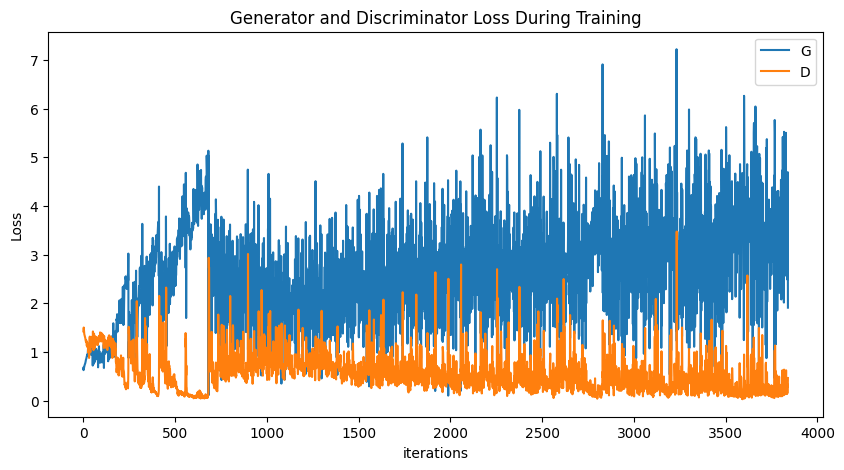

In [15]:
## Plotting the generator and discriminator losses for all the epochs
plt.figure(figsize=(10,5))
plt.title("Generator and Discriminator Loss During Training")
plt.plot(G_losses,label="G")
plt.plot(D_losses,label="D")
plt.xlabel("iterations")
plt.ylabel("Loss")
plt.legend()
plt.show()

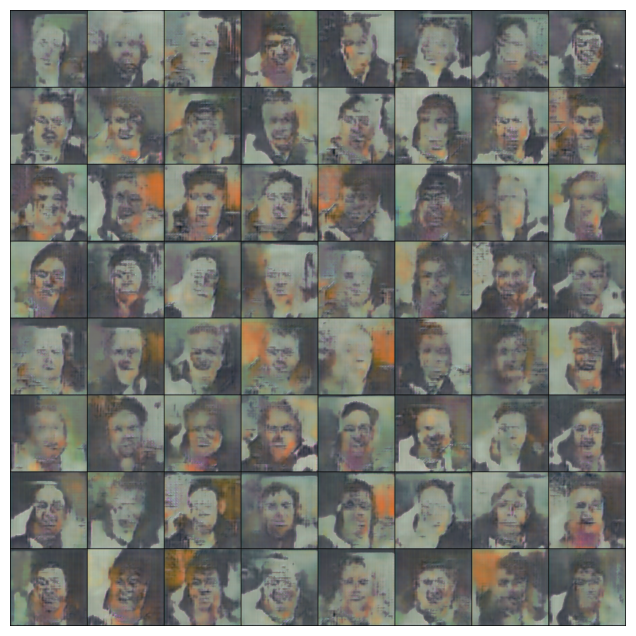

In [16]:
## Displaying the generated images
fig = plt.figure(figsize=(8,8))
plt.axis("off")
ims = [[plt.imshow(np.transpose(i,(1,2,0)), animated=True)] for i in img_list]

As we can see the generated faces almost resemble the actual faces, the model has been able to generate the facial features correctly. Due to computational constraints this is the best we can get. With more training images, deeper networks and epochs we can hope to get images very close to the training set